# Машинное обучение, ФКН ВШЭ

## Практическое задание (Бонус). Разложение ошибки на смещение и разброс

### Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 23:59MSK 24.12.2023

Жесткий дедлайн: 23:59MSK 24.12.2023

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 6 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

### О задании

В этом задании вам предстоит воспользоваться возможностями бутстрапа для оценки смещения и разброса алгоритмов машинного обучения. Делать мы это будем на данных boston:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston = pd.DataFrame(data, columns=columns)
boston["MEDV"] = target


In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
X = boston.drop(columns='MEDV')
y = boston["MEDV"]

In [10]:
X.shape, y.shape

((506, 13), (506,))

In [25]:
np.array([1, 2])/np.array([3, 4])

array([0.33333333, 0.5       ])

### Вычисление bias и variance с помощью бутстрапа
На лекции была выведено следующая формула, показывающая, как можно представить ошибку алгоритма регрессии в виде суммы трех компонент:
$$
L(\mu) = 
    \mathbb{E}_{x, y}\bigl[\mathbb{E}_{X}\bigl[ (y - \mu(X)(x))^2 \bigr]\bigr] = 
$$
$$
    \underbrace{\mathbb{E}_{x, y}\bigl[(y - \mathbb{E}[y|x] )^2\bigr]}_{\text{шум}} + \underbrace{\mathbb{E}_{x}\bigl[(\mathbb{E}_{X}[\mu(X)(x)] - \mathbb{E}[y|x] )^2\bigr]}_{\text{смещение}} +
    \underbrace{\mathbb{E}_{x}\bigl[\mathbb{E}_{X}\bigl[(\mu(X)(x) - \mathbb{E}_{X}[\mu(X)(x)] )^2\bigr]\bigr]}_{\text{разброс}},
$$
* $\mu(X)$ — алгоритм, обученный по выборке $X = \{(x_1, y_1), \dots (x_\ell, y_\ell)\}$;
* $\mu(X)(x)$ — ответ алгоритма, обученного по выборке $X$, на объекте $x$;
* $\mathbb{E}_{X}$ — мат. ожидание по всем возможным выборкам;
* $\mathbb{E}_{X}[\mu(X)(x)]$ — "средний" ответ алгоритма, обученного по всем возможным выборкам $X$, на объекте $x$.
    
С помощью этой формулы мы можем анализировать свойства алгоритма обучения модели $\mu$, если зададим вероятностную модель порождения пар $p(x, y)$.

В реальных задачах мы, конечно же, не знаем распределение на парах объект - правильный ответ. Однако у нас есть набор семплов из этого распределения (обучающую выборка), и мы можем использовать его, чтобы оценивать математические ожидания. Для оценки мат. ожиданий по выборкам мы будем пользоваться бутстрэпом - методом генерации "новых" выборок из одной с помощью выбора объектов с возвращением. Разберем несколько шагов на пути к оценке смещения и разброса.

#### Приближенное вычисление интегралов
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar z} f(\bar z)$ функции от многомерной случайной величины $\bar z = (z_1, \dots, z_d)$, $\bar z \sim p(\bar z)$, можно сгенерировать выборку из распределения $p(\bar z)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar z} f(z) = \int f(\bar z) p(\bar z) d \bar z \approx \frac 1 m \sum_{i=1}^m f(\bar z_i), \, \bar z_i \sim p(\bar z), i = 1, \dots, m.$$

Например, оценим $\mathbb{E}_z z^2,$ $z \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_z z^2 = \sigma^2 + \mu^2 = 34$):

In [6]:
z = np.random.normal(loc=5, scale=3, size=1000)
(z**2).mean()

33.932175246772296

#### Оценивание $\mathbb{E}_{x, y}$
Оценить мат. ожидания по $x$ и по $x, y$, встречающиеся во всех трех компонентах разложения, несложно, потому что у нас есть выборка объектов из распределения данных $p(x, y)$:
$$ \mathbb{E}_{x} f(x) \approx \frac 1 N \sum_{i=1}^N f(x_i), \quad
\mathbb{E}_{x, y} f(x, y) \approx \frac 1 N \sum_{i=1}^N f(x_i, y_i),$$
где $N$ - число объектов в выборке, $\{(x_i, y_i)\}_{i=1}^N$ - сама выборка. 

#### Оценивание $\mathbb{E}_X$ с помощью бутстрапа
Чтобы оценить мат. ожидание по $X$, нам понадобится выборка из выборок:
$$\mathbb{E}_X f(X) \approx \frac 1 s \sum_{j=1}^s f(X_j),$$
где $X_j$ - $j$-я выборка. Чтобы их получить, мы можем воспользоваться бутстрапом - методом генерации выборок на основе выбора объектов с возвращением. Чтобы составить одну выборку, будем $N$ раз выбирать индекс объекта $i \sim \text{Uniform}(1 \dots N)$ и добавлять $i$-ю пару (объект, целевая переменная) в выборку. В результате в каждой выборке могут появиться повторяющиеся объекты, а какие-то объекты могут вовсе не войти в некоторые выборки.

#### Итоговый алгоритм оценки смещения и разброса алгоритма $a$
1. Сгенерировать $s$ выборок $X_j$ методом бутстрапа.
1. На каждой выборке $X_j$ обучить алгоритм $a_j$.
1. Для каждой выборки $X_j$ определить множество объектов $T_j$, не вошедших в нее (out-of-bag). Вычислить предсказания алгоритма $a_j$ на объектах $T_j$. 

Поскольку у нас есть только один ответ для каждого объекта, мы будем считать шум равным 0, а $\mathbb{E}[y|x]$ равным имеющемуся правильному ответу для объекта $x$. 

Итоговые оценки:
* Смещение: для одного объекта - квадрат разности среднего предсказания и правильного ответа. Среднее предсказание берется только по тем алгоритмам $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего смещения выполнить усреденение смещений по объектам.
* Разброс: для одного объекта - выборочная дисперсия предсказаний алгоритмов $a_j$, для которых этот объект входил в out-of-bag выборку $T_j$. Для получения общего разброса выполнить усреденение разбросов по объектам.
* Ошибка $L$: усреднить квадраты разностей предсказания и правильного ответа по всем выполненным предсказаниям для всех объектов.

В результате должно получиться, что ошибка приблизительно равна сумме смещения и разброса!

Алгоритм также вкратце описан по [ссылке](https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part9.pdf) (слайды 19-21).

__1. (1.5 балла)__

Реализуйте описанный алгоритм. Обратите внимание, что если объект не вошел ни в одну из out-of-bag выборок, учитывать его в вычислении итоговых величин не нужно. Как обычно, разрешается использовать только один цикл - по выборкам (от 0 до num_runs-1).

In [22]:
from sklearn.base import clone

$$
    \underbrace{\mathbb{E}_{x, y}\bigl[(y - \mathbb{E}[y|x] )^2\bigr]}_{\text{шум}} + \underbrace{\mathbb{E}_{x}\bigl[(\mathbb{E}_{X}[\mu(X)(x)] - \mathbb{E}[y|x] )^2\bigr]}_{\text{смещение}} +
    \underbrace{\mathbb{E}_{x}\bigl[\mathbb{E}_{X}\bigl[(\mu(X)(x) - \mathbb{E}_{X}[\mu(X)(x)] )^2\bigr]\bigr]}_{\text{разброс}},
$$

In [39]:
def compute_bias_variance(regressor, X, y, num_runs=1000):
    n = X.shape[0]
    models = []
    Tj = []

    for _ in range(num_runs):
        idx = np.random.choice(n, size=n, replace=True)
        X_bootstrap = X.iloc[idx]
        y_bootstrap = y.iloc[idx]
        model = clone(regressor).fit(X_bootstrap, y_bootstrap)
        models.append(model)

        mask = np.ones(n, dtype=bool)
        mask[idx] = False
        Tj.append(mask)

    Tj = np.array(Tj)
    all_preds = np.array([model.predict(X) for model in models])

    not_included_count = Tj.sum(axis=0)
    valid_mask = not_included_count > 0

    masked_preds = np.where(Tj, all_preds, 0.0)
    mean_preds = masked_preds.sum(axis=0) / (not_included_count + 1e-8)

    # Bias^2
    bias_squared = ((mean_preds[valid_mask] - y[valid_mask]) ** 2).mean()

    # Variance
    residuals = (all_preds - mean_preds.reshape(1, -1)) ** 2
    masked_residuals = np.where(Tj, residuals, 0.0)
    variance = (masked_residuals.sum(axis=0) / (not_included_count + 1e-8))[valid_mask].mean()

    # Err
    squared_errors = (all_preds - y.values.reshape(1, -1)) ** 2
    masked_errors = np.where(Tj, squared_errors, 0.0)
    error = (masked_errors.sum(axis=0) / (not_included_count + 1e-8))[valid_mask].mean()

    return bias_squared, variance, error

__2. (0 баллов)__

Оцените смещение, разброс и ошибку для трех алгоритмов с гиперпараметрами по умолчанию: линейная регрессия, решающее дерево, случайный лес.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
names = ['LinReg', 'DecTree', 'RandForest']

In [50]:
results = pd.DataFrame(columns=['bias', 'variance', 'noise', 'error'])

In [52]:
for model, name in zip(models, names):
    num_runs = 200 if isinstance(model, RandomForestRegressor) else 1000
    estimates = compute_bias_variance(model, X, y, num_runs=num_runs)
    delta = estimates[0] + estimates[1] - estimates[2]
    bias = estimates[0]
    variance = estimates[1]
    error = estimates[2]
    results.loc[name] = [bias, variance, 0, error]
    print(f'Regressor - {name}, bias = {estimates[0]:.4f}, variance = {estimates[1]:.4f}, error = {estimates[2]:.4f}, delta = {delta:.4f}')

Regressor - LinReg, bias = 23.6911, variance = 0.9347, error = 24.6258, delta = 0.0000
Regressor - DecTree, bias = 10.3450, variance = 13.1777, error = 23.5227, delta = 0.0000
Regressor - RandForest, bias = 10.7375, variance = 2.2096, error = 12.9471, delta = 0.0000


__3. (0.5 баллов)__
Проанализируйте полученный результат. Согласуются ли полученные результаты с теми, что мы обсуждали на занятиях (с комментарием)?

__Your answer here:__ Как мы видим, наше разложение ошибки на смещение шум и разброс оказался верным с точностью до нуля.

__4. (0.5 баллов)__
Постройте бэггинг над всеми тремя моделями (линейная регрессия, решающее дерево, случайный лес). Вспомните обсуждение с лекции о том, во сколько раз в теории бэггинг уменьшает разброс базового алгоритма. Выполняется ли это в ваших экспериментах? Если нет, поясните, почему.

__Your answer here:__ Для линейной регрессии и для случайного леса не выполнилось (так как это уже ансамбль). Насчет линрега, так как теоретическое решение весов у нас может быть записано в виде матрицы, а сами эти матрицы это те же X, то решение у нас каждый раз особо не меняется поскольку мы просто можем убрать какие то строчки (из-за лин зависимости) и будет решение из уникальных строчек. 

Заметное уменьшение разброса у нас получила модель дерева решений, в силу того что она сама по себе склона к переобучению, ее Var тоже может меняться, как раз таки разброс мы и стабилизировали через бэггинг.

In [41]:
from sklearn.base import BaseEstimator

In [43]:
class BaggingRegressor(BaseEstimator):
    def __init__(self, estimator, n_estimators=100):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        n = X.shape[0]
        for _ in range(self.n_estimators):
            idx = np.random.choice(n, size=n, replace=True)
            X_bootstrap = X.iloc[idx]
            y_bootstrap = y.iloc[idx]
            model = clone(self.estimator).fit(X_bootstrap, y_bootstrap)
            self.estimators.append(model)
        return self
    
    def predict(self, X):
        preds = np.array([model.predict(X) for model in self.estimators])
        return preds.mean(axis=0)

In [53]:
results

,bias,variance,noise,error
LinReg,23.691141,0.934707,0.0,24.625848
DecTree,10.345036,13.177680,0.0,23.522716
RandForest,10.737495,2.209558,0.0,12.947053


In [54]:
names_new = [name + 'Bag' for name in names]
names_new

['LinRegBag', 'DecTreeBag', 'RandForestBag']

In [57]:
for model, name in zip(models, names_new):
    reg = BaggingRegressor(model, n_estimators=10)
    num_runs = 20 if isinstance(model, RandomForestRegressor) else 100
    estimates = compute_bias_variance(reg, X, y, num_runs=num_runs)
    delta = estimates[0] + estimates[1] - estimates[2]
    bias = estimates[0]
    variance = estimates[1]
    error = estimates[2]
    results.loc[name] = [bias, variance, 0, error]
    print(f'Regressor - {name}, bias = {estimates[0]:.4f}, variance = {estimates[1]:.4f}, error = {estimates[2]:.4f}, delta = {delta:.4f}')

Regressor - LinRegBag, bias = 23.7525, variance = 1.0102, error = 24.7627, delta = 0.0000
Regressor - DecTreeBag, bias = 10.5317, variance = 3.4489, error = 13.9806, delta = 0.0000
Regressor - RandForestBag, bias = 10.4064, variance = 1.2924, error = 11.6988, delta = 0.0000


In [60]:
for n1, n2 in zip(names, names_new):
    print(f'Variance from {n1} is less in {results.loc[n1, "variance"]/results.loc[n2, "variance"]}')

Variance from LinReg is less in 0.92528866796044
Variance from DecTree is less in 3.8208483993611444
Variance from RandForest is less in 1.7096968134420834


### Визуализация предсказаний базовых алгоритмов бэггинга

В материалах лекций можно найти изображение, похожее на мишень - визуализация алгоритмов с разным смещением и разным разбросом. В центре "мишени" - правильный ответ, а "попадания" - предсказания алгоритмов, обученных по разным выборкам. Построим похожее изображение на наших данных для трех алгоритмов. Наши "мишени" будут одномерными, потому что мы решаем задачу одномерной регрессии.

__5. (1.5 балла)__

Реализуйте функцию plot_predictions. Она должна выполнять следующие действия:
1. Случайно выбрать num_test_objects пар объект-целевая переменная из выборки X, y. Получится две выборки: маленькая X_test, y_test (выбранные тестовые объекты) и X_train, y_train (остальные объекты).
1. Сгенерировать num_runs выборок методом бутстарапа из X_train, y_train. На каждой выборке обучить алгоритм regressor и сделать предсказания для X_test.
1. Нарисовать scatter-график. По оси абсцисс - объекты тестовой выборки (номера от 0 до num_test_objects-1), по оси ординат - предсказания. В итоге получится num_test_objects столбиков с точками. Для каждого тестового объекта надо отметить одним цветом все предсказания для него, а также черным цветом отметить правильный ответ.
1. Подпишите оси и название графика (аргумент title).

In [72]:
def plot_predictions(regressor, X, y, num_runs=100, num_test_objects=10, title=""):
    n = X.shape[0]
    test_idx = np.random.choice(n, size=num_test_objects, replace=False)
    all_idx = np.arange(n)
    train_idx = np.setdiff1d(all_idx, test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    preds = []
    for _ in range(num_runs):
        n1 = X_train.shape[0]
        idx = np.random.choice(n1, size=n1, replace=True)
        X_bootstrap, y_bootstrap = X_train.iloc[idx], y_train.iloc[idx]
        model = clone(regressor).fit(X_bootstrap, y_bootstrap)
        preds.append(model.predict(X_test))

    preds = np.array(preds)
    for i in range(num_test_objects):
        plt.scatter([i + 1] * num_runs, preds[:, i], alpha=0.5, label='Predictions' if i == 0 else None)
        plt.scatter(i + 1, y_test.iloc[i], color='black', marker='x', s=80, label='True value' if i == 0 else None)

    plt.xlabel("Test object index")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    """
    plot graphics described above
    """

__6. (0 баллов)__

Нарисуйте графики для линейной регрессии, решающего дерева и случайного леса. Нарисуйте три графика в строчку (это можно сделать с помощью plt.subplot) с одинаковой осью ординат (это важно для понимания масштаба разброса у разных алгоритмов):

Estimator - LinReg


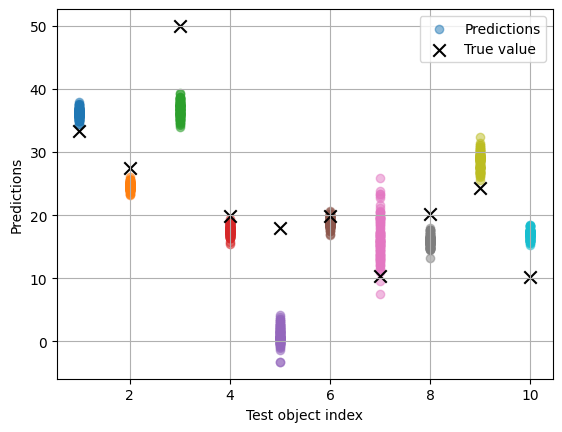

Estimator - DecTree


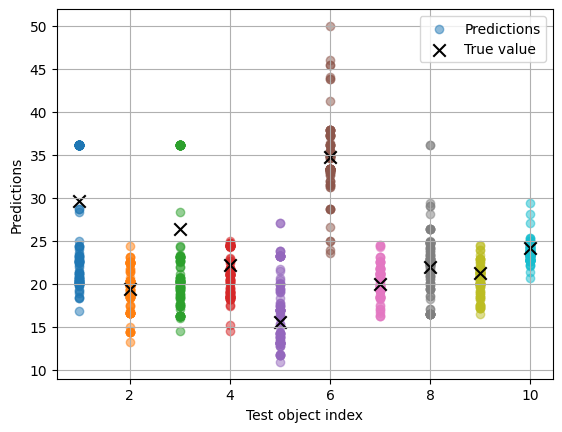

Estimator - RandForest


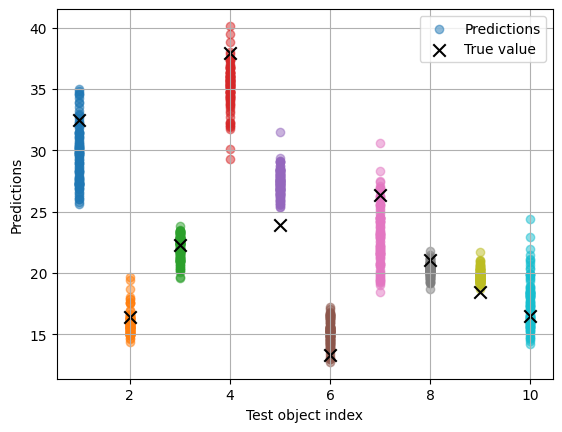

In [63]:
for model, name in zip(models, names):
    print(f'Estimator - {name}')
    plot_predictions(model, X, y)

__7. (0.5 баллов)__

Для каждого графика прокомментируйте, как он характеризует смещение и разброс соответствующего алгоритма. 

**Linear regression:** Предсказания для каждого тестового объекта сгруппированы очень плотно, что указывает на низкий разброс (variance). Это ожидаемо, так как линейная регрессия — стабильный алгоритм. Также видно, что средние предсказания близки к истинным значениям, следовательно, смещение (bias) у модели невелико.

**Decision Trees:** У решающих деревьев предсказания более разбросаны — variance выше, чем у линейной регрессии. Это объясняется тем, что дерево — нестабильный алгоритм, чувствительный к изменениям в обучающей выборке. Кроме того, смещение (bias) у деревьев несколько выше, чем у линейной регрессии, что также подтверждается графиком.

**Random forest:** Случайный лес, как ансамблевый метод, показывает компромисс между смещением и разбросом. Благодаря усреднению по деревьям, разброс у него заметно ниже, чем у одного дерева. Смещение при этом находится на уровне линейной регрессии или даже ниже, что делает его наиболее сбалансированным из трёх моделей.

### Изменение bias и variance при изменении гиперпараметров

__8. (0 баллов)__

Постройте графики зависимости смещения и разброса от гиперпараметров решающего дерева max_depth (от 1 до 10) и max_features (от 1 до X.shape[1]):

**Ответ:** Уже делали на прошлых домашках 

__9. (0 баллов)__

Постройте графики зависимости смещения и разброса от n_estimators (по сетке 2**np.arange(1, 10)) для случайного леса и градиентного бустинга:

In [73]:
def plot_predictions(regressor, X, y, num_runs=100, num_test_objects=10, title="", ax=None):
    if ax is None:
        ax = plt.gca()  # если ось не передана — рисуем на текущей

    n = X.shape[0]
    test_idx = np.random.choice(n, size=num_test_objects, replace=False)
    train_idx = np.setdiff1d(np.arange(n), test_idx)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    preds = []
    for _ in range(num_runs):
        idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_bootstrap, y_bootstrap = X_train.iloc[idx], y_train.iloc[idx]
        model = clone(regressor).fit(X_bootstrap, y_bootstrap)
        preds.append(model.predict(X_test))

    preds = np.array(preds)

    for i in range(num_test_objects):
        ax.scatter([i + 1] * num_runs, preds[:, i], alpha=0.4, s=10)
        ax.scatter(i + 1, y_test.iloc[i], color='black', marker='x', s=50)

    ax.set_title(title)
    ax.set_xlabel("Test object index")
    ax.set_ylabel("Predictions")
    ax.grid(True)


In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

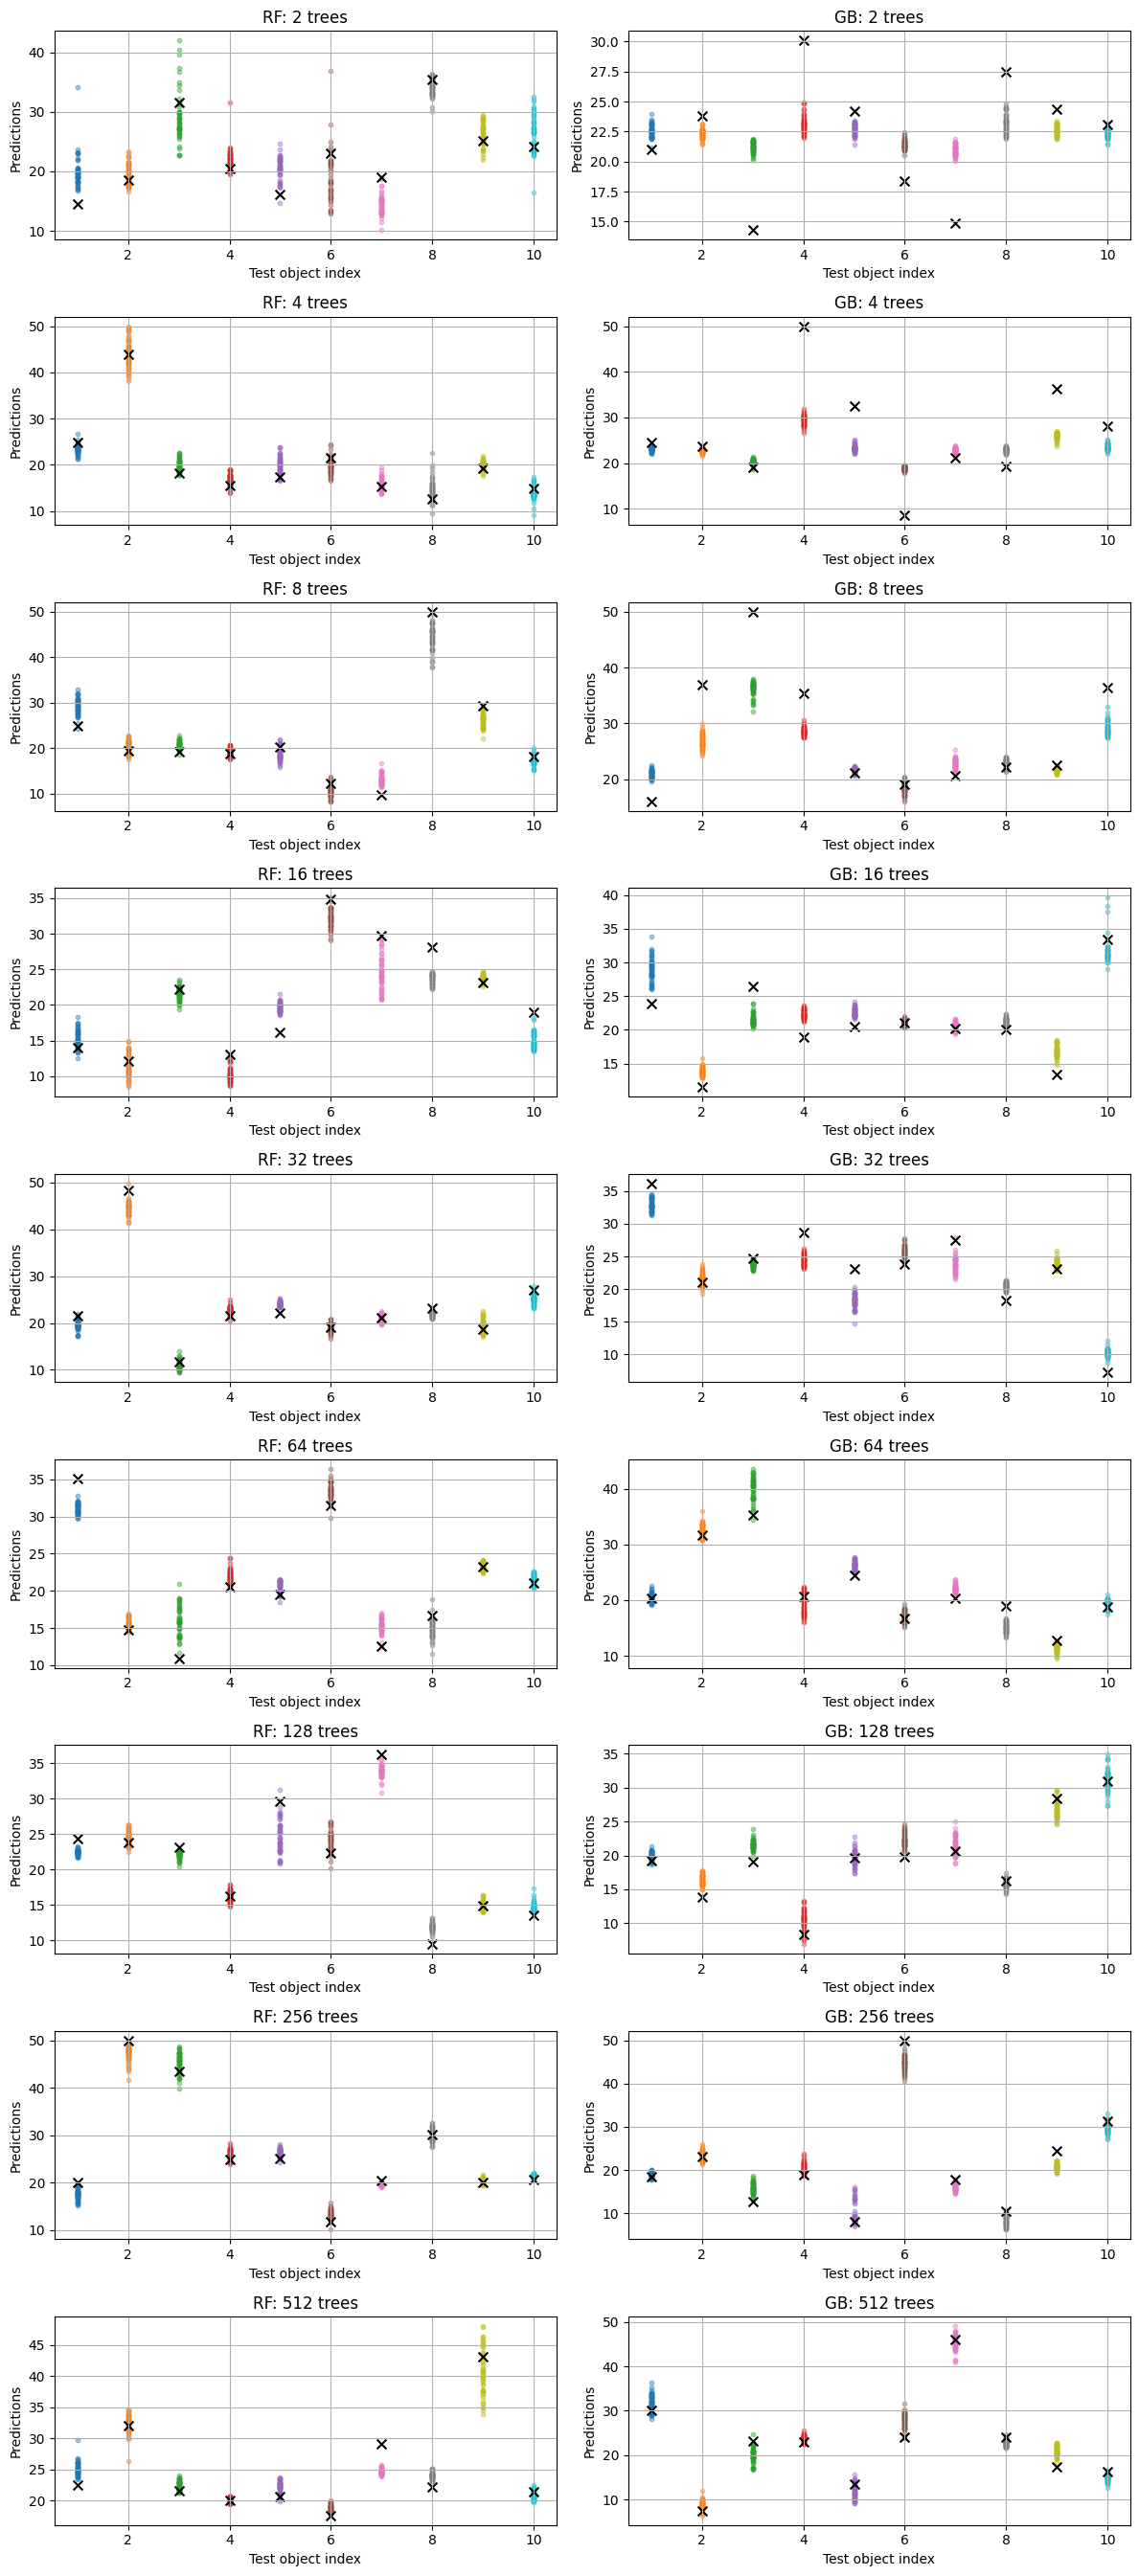

In [76]:
n_estimators_list = 2 ** np.arange(1, 10)

fig, axes = plt.subplots(len(n_estimators_list), 2, figsize=(12, 3 * len(n_estimators_list)))

for i, n_estimators in enumerate(n_estimators_list):
    rf = RandomForestRegressor(n_estimators=n_estimators)
    gb = GradientBoostingRegressor(n_estimators=n_estimators)

    plot_predictions(rf, X, y, num_runs=50, num_test_objects=10, title=f"RF: {n_estimators} trees", ax=axes[i, 0])

    plot_predictions(gb, X, y, num_runs=50, num_test_objects=10, title=f"GB: {n_estimators} trees", ax=axes[i, 1])

plt.tight_layout()
plt.show()

__10. (1.5 балла)__

Прокомментируйте графики (всего 4 графика): почему они имеют такой вид.

__Your answer here:__

На графиках видно что пока количество моделей как параметр мало, градиентный бустинг имеет более выраженный Bias нежели случайный лес. Потом же картина все больше стабилизируется 